<Figure size 432x432 with 0 Axes>

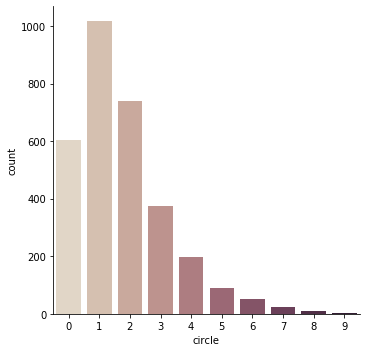

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot

data_path = r'.\data\Processed_data\processed_data.shp'
shape_data = gpd.read_file(data_path)

import seaborn as sns
plt.figure(figsize=(6,6))
sns_plot = sns.catplot(x="circle", kind="count", palette="ch:.25", data=shape_data)

sns_plot.savefig('pic/circlecount.png')

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import numpy as np
import pandas as pd
import os

# load processed shapefile
new_shp = gpd.read_file("./data/Processed_data/processed_data.shp")

In [3]:
# every 87,000m draw a circle

def draw_circle(d):
    return int(d//87000)

new_shp['circle'] = new_shp.apply(lambda x: draw_circle(x.distance), axis = 1)
#new_shp

In [4]:
import geopandas as gpd
state_path = r'data\cb_2018_us_state_500k\cb_2018_us_state_500k.shp'
shape_state = gpd.read_file(state_path)
shape_state = shape_state[shape_state.NAME != 'Alaska']
shape_state = shape_state[shape_state.NAME != 'Hawaii']
shape_state = shape_state[shape_state.NAME != 'Commonwealth of the Northern Mariana Islands']
shape_state = shape_state[shape_state.NAME != 'United States Virgin Islands']
shape_state = shape_state[shape_state.NAME != 'Puerto Rico']
shape_state = shape_state[shape_state.NAME != 'Guam']
shape_state = shape_state[shape_state.NAME != 'American Samoa']
#shape_state

In [5]:
circle_group_bed = new_shp.groupby(["STATE_NAME","circle"])["BEDS"].mean()
#circle_group_bed
g_tex = circle_group_bed.loc["Texas"]
list(g_tex[[0]].values)[0]
list(g_tex.values)

[680.0909090909091,
 359.6774193548387,
 477.17021276595744,
 662.3469387755102,
 80.93478260869566,
 317.04,
 109.22222222222223,
 98.125,
 16.22222222222222,
 1233.0]

In [6]:
def circle_value(circle):
#     print(circle)
    return list(g_tex[[circle]].values)[0]

shp_tex = new_shp[new_shp["STATE_NAME"]=="Texas"]
shp_tex["profile"] = shp_tex["circle"].apply(lambda x: circle_value(x))
shp_tex

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,distance,circle,COVID,population,BEDS,...,% Uninsure,Primary Ca,Preventabl,% Vaccinat,% Unemploy,Social Ass,Average Da,Life Expec,geometry,profile
1849,Lipscomb,Texas,48,295,48295,713158.212987,8,2,3233.0,0.0,...,29.498738,nan,5581.000000,29.0,2.715751,29.603316,7.0,79.650275,"POLYGON ((-100.00727 36.49391, -100.00155 36.4...",16.222222
1850,Sherman,Texas,48,421,48421,774590.539552,8,23,3022.0,0.0,...,29.602470,nan,3995.000000,36.0,2.694611,19.563091,6.5,80.065820,"POLYGON ((-102.16803 36.05466, -102.16567 36.4...",16.222222
1852,Dallam,Texas,48,111,48111,805796.118104,9,14,7287.0,0.0,...,30.456773,1442,4207.000000,27.0,2.036810,13.873474,6.0,78.735005,"POLYGON ((-102.16803 36.05466, -103.02405 36.0...",1233.000000
1853,Hansford,Texas,48,195,48195,745395.458843,8,12,5399.0,25.0,...,26.362649,2724,646.000000,29.0,2.327197,14.686984,7.1,77.905809,"POLYGON ((-101.61994 36.05475, -101.62076 36.4...",16.222222
1862,Ochiltree,Texas,48,357,48357,728887.926954,8,29,9836.0,25.0,...,28.640233,2518,6387.000000,33.0,2.830399,15.884046,7.1,77.278818,"POLYGON ((-101.08275 36.05630, -101.09010 36.4...",16.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Kenedy,Texas,48,261,48261,364957.740589,4,0,404.0,0.0,...,22.848665,417,5289.681803,44.0,3.719008,0.000000,8.4,77.455742,"MULTIPOLYGON (((-97.96403 26.61310, -97.99179 ...",80.934783
2915,Starr,Texas,48,427,48427,434101.733396,4,14,64633.0,48.0,...,28.887085,4958,6903.000000,25.0,10.104295,2.327241,8.6,79.066901,"POLYGON ((-98.60027 26.26080, -98.67822 26.242...",80.934783
2916,Hidalgo,Texas,48,215,48215,443598.323715,5,389,868707.0,2386.0,...,31.207924,2224,5360.000000,46.0,6.562328,3.567026,9.4,82.097479,"POLYGON ((-98.60027 26.26080, -98.34157 26.787...",317.040000
2918,Willacy,Texas,48,489,48489,424602.486176,4,14,21358.0,0.0,...,22.316403,2698,5558.000000,53.0,9.935747,5.096368,8.8,77.663524,"MULTIPOLYGON (((-97.86923 26.34870, -97.87389 ...",80.934783


In [7]:
# shp_tex['profile'].round(0)
shp_tex['profile'] = shp_tex['profile'].astype(int)
keys = sorted(list(shp_tex['profile'].unique()))
keys

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[16, 80, 98, 109, 317, 359, 477, 662, 680, 1233]

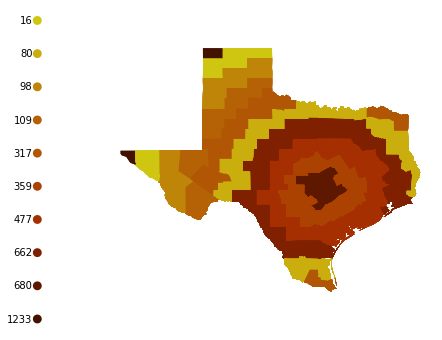

In [8]:
#https://towardsdatascience.com/create-categorical-choropleth-with-python-122da5ae6764
colors= ['#cec610','#c9ae0d','#be8509','#b56105','#b15604','#ab4202','#a52f01','#7f2000','#5f1800','#431100']

color_dict = dict(zip(keys, colors))
#color_dict[‘No data’] = ‘lightgray’

#grid
row_count = shp_tex['profile'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
    ax_string = ','.join(ax_list)

#plotgrid with 4 columns and N number of rows.
fig, (ax_string) = plt.subplots(row_count, 4, figsize=(8,6))


# plot map
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in shp_tex.iterrows():
    plot = shp_tex[shp_tex['profile'] == row['profile']].plot(color=color_dict[row['profile']], ax=ax1)
ax1.axis('off')

# plot legend
row_counter = 0
#for i in shp_tex['profile'].unique():
for i in keys:
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1
    
fig.savefig('pic\spt_4.png')